### Imports and Setup

In [1]:
import sys
from pathlib import Path

project_root = Path.cwd().resolve().parent  # parent of notebooks/
sys.path.append(str(project_root))

from src.eda import EthiopiaFinancialInclusionEDA

### Instantiate Class

In [2]:
data_path = project_root / "data" / "processed" / "ethiopia_fi_enriched_data.csv"
fig_dir = project_root / "reports" / "figures"/"eda"

eda = EthiopiaFinancialInclusionEDA(data_path=data_path, output_dir=fig_dir)

Unique indicator codes in the dataset:
<StringArray>
[     'ACC_OWNERSHIP',     'ACC_MM_ACCOUNT',         'ACC_4G_COV',
     'ACC_MOBILE_PEN',          'ACC_FAYDA',      'USG_P2P_COUNT',
      'USG_P2P_VALUE',      'USG_ATM_COUNT',      'USG_ATM_VALUE',
      'USG_CROSSOVER', 'USG_TELEBIRR_USERS', 'USG_TELEBIRR_VALUE',
    'USG_MPESA_USERS',   'USG_MPESA_ACTIVE',    'USG_ACTIVE_RATE',
    'AFF_DATA_INCOME',        'GEN_GAP_ACC',       'GEN_MM_SHARE',
     'GEN_GAP_MOBILE',     'ACC_SMARTPHONE',       'USG_INTERNET']
Length: 21, dtype: str


In [3]:
# Path to enriched impact links CSV
links_path = project_root / "data" / "processed" / "ethiopia_fi_impact_links.csv"


In [4]:
# Load impact links
eda.load_impact_links(links_path)


2026-02-02 11:06:12,390 | INFO | Impact links loaded: 5 records


### Dataset Overview & Quality

In [5]:
eda.summarize_dataset()

2026-02-02 11:06:12,402 | INFO | === DATASET OVERVIEW ===
2026-02-02 11:06:12,403 | INFO | 
RECORD_TYPE:
record_type
observation    32
event          14
target          3
Name: count, dtype: int64
2026-02-02 11:06:12,403 | INFO | 
PILLAR:
pillar
ACCESS           17
NaN              14
USAGE            12
GENDER            5
AFFORDABILITY     1
Name: count, dtype: int64
2026-02-02 11:06:12,403 | INFO | 
SOURCE_TYPE:
source_type
operator      17
survey        10
regulator      8
research       6
policy         3
calculated     2
news           2
government     1
Name: count, dtype: int64
2026-02-02 11:06:12,403 | INFO | 
CONFIDENCE:
confidence
high      42
medium     7
Name: count, dtype: int64


{'record_type': record_type
 observation    32
 event          14
 target          3
 Name: count, dtype: int64,
 'pillar': pillar
 ACCESS           17
 NaN              14
 USAGE            12
 GENDER            5
 AFFORDABILITY     1
 Name: count, dtype: int64,
 'source_type': source_type
 operator      17
 survey        10
 regulator      8
 research       6
 policy         3
 calculated     2
 news           2
 government     1
 Name: count, dtype: int64,
 'confidence': confidence
 high      42
 medium     7
 Name: count, dtype: int64}

In [6]:
eda.dataset_summary_table()

2026-02-02 11:06:12,423 | INFO | === DATASET SUMMARY TABLE ===
2026-02-02 11:06:12,423 | INFO | total_records: 49
2026-02-02 11:06:12,425 | INFO | observations: 32
2026-02-02 11:06:12,425 | INFO | events: 14
2026-02-02 11:06:12,426 | INFO | impact_links: 5
2026-02-02 11:06:12,426 | INFO | indicators: 21
2026-02-02 11:06:12,426 | INFO | date_min: 2014-12-31 00:00:00
2026-02-02 11:06:12,426 | INFO | date_max: 2025-12-31 00:00:00
2026-02-02 11:06:12,428 | INFO | years_covered: [2014, 2017, 2021, 2023, 2024, 2025]


{'total_records': 49,
 'observations': 32,
 'events': 14,
 'impact_links': 5,
 'indicators': 21,
 'date_min': Timestamp('2014-12-31 00:00:00'),
 'date_max': Timestamp('2025-12-31 00:00:00'),
 'years_covered': [2014, 2017, 2021, 2023, 2024, 2025]}

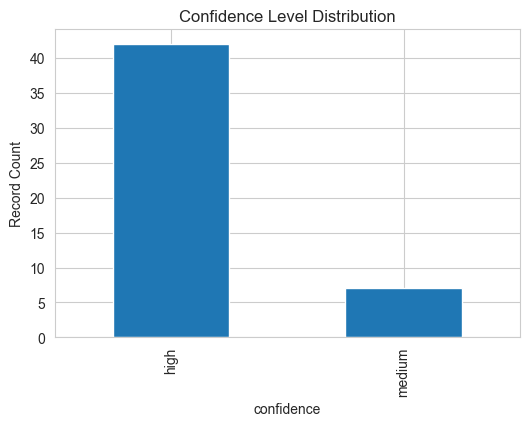

In [7]:
eda.plot_confidence_distribution()

### Temporal Coverage

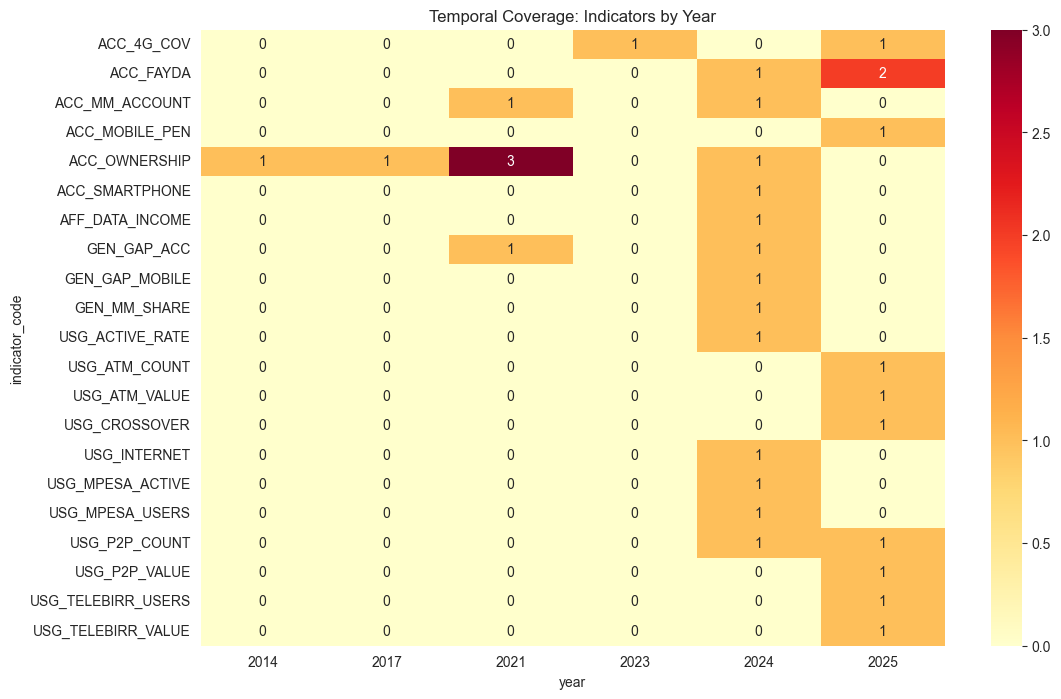

year,2014,2017,2021,2023,2024,2025
indicator_code,,,,,,
ACC_4G_COV,0,0,0,1,0,1
ACC_FAYDA,0,0,0,0,1,2
ACC_MM_ACCOUNT,0,0,1,0,1,0
ACC_MOBILE_PEN,0,0,0,0,0,1
ACC_OWNERSHIP,1,1,3,0,1,0
ACC_SMARTPHONE,0,0,0,0,1,0
AFF_DATA_INCOME,0,0,0,0,1,0
GEN_GAP_ACC,0,0,1,0,1,0
GEN_GAP_MOBILE,0,0,0,0,1,0


In [8]:
eda.temporal_coverage_heatmap()


In [9]:
eda.identify_sparse_indicators(min_points=2)

2026-02-02 11:06:13,855 | INFO | === SPARSE INDICATORS ===
2026-02-02 11:06:13,856 | INFO | indicator_code
ACC_MOBILE_PEN        1
ACC_SMARTPHONE        1
AFF_DATA_INCOME       1
GEN_GAP_MOBILE        1
GEN_MM_SHARE          1
USG_ACTIVE_RATE       1
USG_ATM_COUNT         1
USG_ATM_VALUE         1
USG_CROSSOVER         1
USG_INTERNET          1
USG_MPESA_ACTIVE      1
USG_MPESA_USERS       1
USG_P2P_VALUE         1
USG_TELEBIRR_USERS    1
USG_TELEBIRR_VALUE    1
dtype: int64


indicator_code
ACC_MOBILE_PEN        1
ACC_SMARTPHONE        1
AFF_DATA_INCOME       1
GEN_GAP_MOBILE        1
GEN_MM_SHARE          1
USG_ACTIVE_RATE       1
USG_ATM_COUNT         1
USG_ATM_VALUE         1
USG_CROSSOVER         1
USG_INTERNET          1
USG_MPESA_ACTIVE      1
USG_MPESA_USERS       1
USG_P2P_VALUE         1
USG_TELEBIRR_USERS    1
USG_TELEBIRR_VALUE    1
dtype: int64

### Pillar & Access

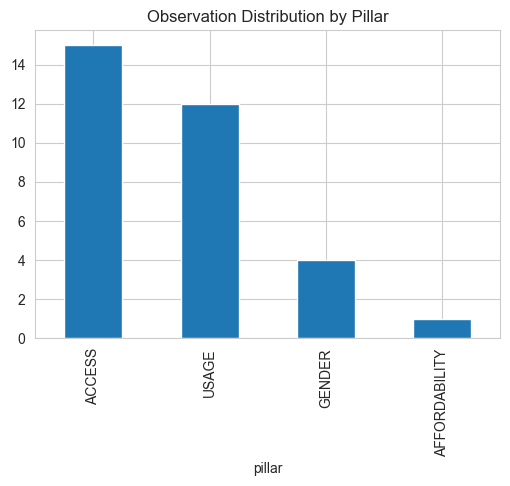

pillar
ACCESS           15
USAGE            12
GENDER            4
AFFORDABILITY     1
Name: count, dtype: int64

In [10]:
eda.pillar_distribution()

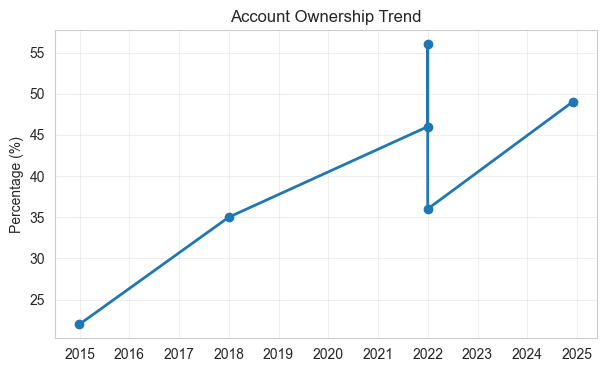

,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,year
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN,2014
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN,2017
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN,2021
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021
5,REC_0006,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,49.0,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,Account ownership increased from 46% to 49%,Survey Oct-Nov 2024,NaN,2024


In [11]:
eda.plot_account_ownership()

In [12]:
eda.calculate_growth_rates("ACC_OWNERSHIP")

,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,year,growth_pp
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN,2014,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN,2017,13.0
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN,2021,11.0
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021,10.0
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021,-20.0
5,REC_0006,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,49.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20,Account ownership increased from 46% to 49%,Survey Oct-Nov 2024,NaN,2024,13.0


In [13]:
eda.calculate_cagr("ACC_OWNERSHIP")


0.08412629170063868

### Usage Trends

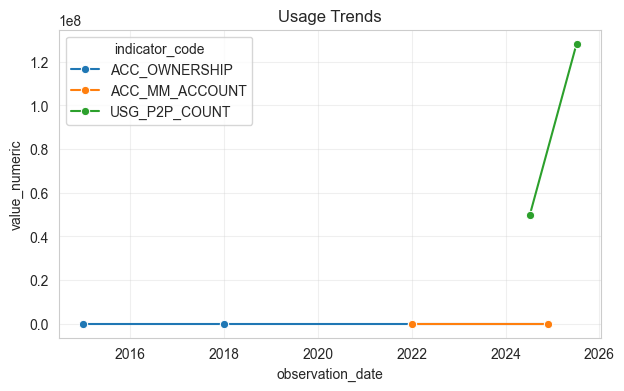

,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,year
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,2.200000e+01,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN,2014
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,3.500000e+01,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN,2017
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,4.600000e+01,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN,2021
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,5.600000e+01,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,3.600000e+01,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021
5,REC_0006,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,4.900000e+01,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,Account ownership increased from 46% to 49%,Survey Oct-Nov 2024,NaN,2024
6,REC_0007,observation,NaN,ACCESS,Mobile Money Account Rate,ACC_MM_ACCOUNT,higher_better,4.700000e+00,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN,2021
7,REC_0008,observation,NaN,ACCESS,Mobile Money Account Rate,ACC_MM_ACCOUNT,higher_better,9.450000e+00,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Doubled from 2021,NaN,2024
14,REC_0015,observation,NaN,USAGE,P2P Transaction Count,USG_P2P_COUNT,higher_better,4.970000e+07,NaN,count,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Previous year for comparison,NaN,2024
15,REC_0016,observation,NaN,USAGE,P2P Transaction Count,USG_P2P_COUNT,higher_better,1.283000e+08,NaN,count,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,128.3 million P2P transactions,+158% YoY growth,NaN,2025


In [14]:
eda.plot_usage_trends(["ACC_OWNERSHIP", "USG_P2P_COUNT", "ACC_MM_ACCOUNT"])


### Infrastructure

Filtered data:
   record_id  record_type category  pillar                    indicator  \
8   REC_0009  observation      NaN  ACCESS       4G Population Coverage   
43  OBS_0034  observation      NaN  ACCESS  Smartphone Penetration Rate   
9   REC_0010  observation      NaN  ACCESS       4G Population Coverage   

    indicator_code indicator_direction  value_numeric value_text  value_type  \
8       ACC_4G_COV       higher_better           37.5        NaN  percentage   
43  ACC_SMARTPHONE       higher_better           32.0        NaN  percentage   
9       ACC_4G_COV       higher_better           70.8        NaN  percentage   

    ... impact_magnitude impact_estimate lag_months evidence_basis  \
8   ...              NaN             NaN        NaN            NaN   
43  ...              NaN             NaN        NaN            NaN   
9   ...              NaN             NaN        NaN            NaN   

   comparable_country collected_by                          collection_date  \
8  

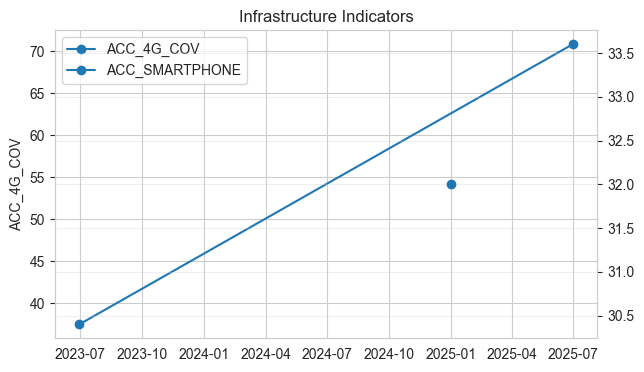

,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,year
8,REC_0009,observation,NaN,ACCESS,4G Population Coverage,ACC_4G_COV,higher_better,37.5,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Before major expansion,NaN,2023
43,OBS_0034,observation,NaN,ACCESS,Smartphone Penetration Rate,ACC_SMARTPHONE,higher_better,32.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Tester,2026-02-02,Smartphone adoption in Ethiopia reached approx...,Smartphone access is a prerequisite for mobile...,2024
9,REC_0010,observation,NaN,ACCESS,4G Population Coverage,ACC_4G_COV,higher_better,70.8,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,4G coverage doubled from 37.5% to 70.8%,Major infrastructure investment,NaN,2025


In [15]:
eda.plot_infrastructure_indicators(["ACC_4G_COV", "ACC_SMARTPHONE"])


### Events

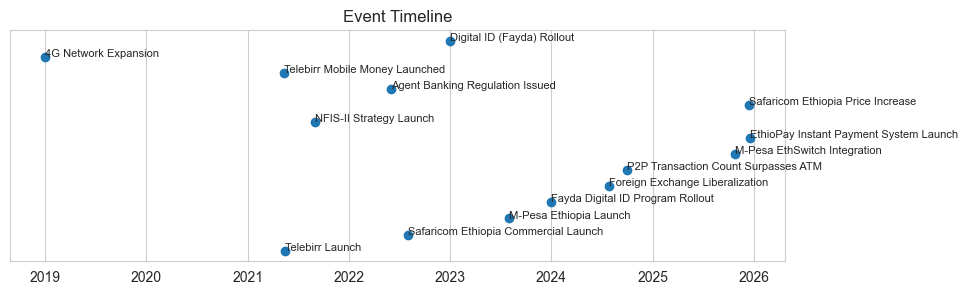

,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,event_date
33,EVT_0001,event,product_launch,NaN,Telebirr Launch,EVT_TELEBIRR,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,First major mobile money service in Ethiopia,NaN,2021-05-17
34,EVT_0002,event,market_entry,NaN,Safaricom Ethiopia Commercial Launch,EVT_SAFARICOM,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,End of state telecom monopoly,NaN,2022-08-01
35,EVT_0003,event,product_launch,NaN,M-Pesa Ethiopia Launch,EVT_MPESA,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Second mobile money entrant,NaN,2023-08-01
36,EVT_0004,event,infrastructure,NaN,Fayda Digital ID Program Rollout,EVT_FAYDA,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,National biometric digital ID system,NaN,2024-01-01
37,EVT_0005,event,policy,NaN,Foreign Exchange Liberalization,EVT_FX_REFORM,NaN,NaN,Implemented,categorical,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Birr float introduced,NaN,2024-07-29
38,EVT_0006,event,milestone,NaN,P2P Transaction Count Surpasses ATM,EVT_CROSSOVER,NaN,NaN,Achieved,categorical,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Historic: digital > cash for first time,NaN,2024-10-01
39,EVT_0007,event,partnership,NaN,M-Pesa EthSwitch Integration,EVT_MPESA_INTEROP,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Full interoperability for M-Pesa,NaN,2025-10-27
40,EVT_0008,event,infrastructure,NaN,EthioPay Instant Payment System Launch,EVT_ETHIOPAY,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,National real-time payment system,NaN,2025-12-18
41,EVT_0009,event,policy,NaN,NFIS-II Strategy Launch,EVT_NFIS2,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,5-year national financial inclusion strategy,NaN,2021-09-01
42,EVT_0010,event,pricing,NaN,Safaricom Ethiopia Price Increase,EVT_SAFCOM_PRICE,NaN,NaN,Implemented,categorical,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Data and voice prices increased 20-82%,NaN,2025-12-15


In [16]:
eda.plot_event_timeline()

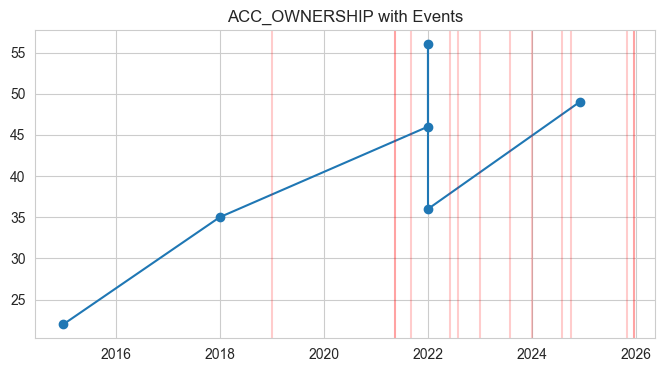

In [17]:
eda.plot_indicator_with_events("ACC_OWNERSHIP")

### Correlation

In [18]:
indicators = ["ACC_OWNERSHIP", "ACC_MM_ACCOUNT", "USG_P2P_COUNT", "INF_4G_COVERAGE"]
eda.correlation_matrix(indicators)

indicator_code,ACC_MM_ACCOUNT,ACC_OWNERSHIP,USG_P2P_COUNT
indicator_code,,,
ACC_MM_ACCOUNT,1.0,1.0,NaN
ACC_OWNERSHIP,1.0,1.0,NaN
USG_P2P_COUNT,NaN,NaN,1.0


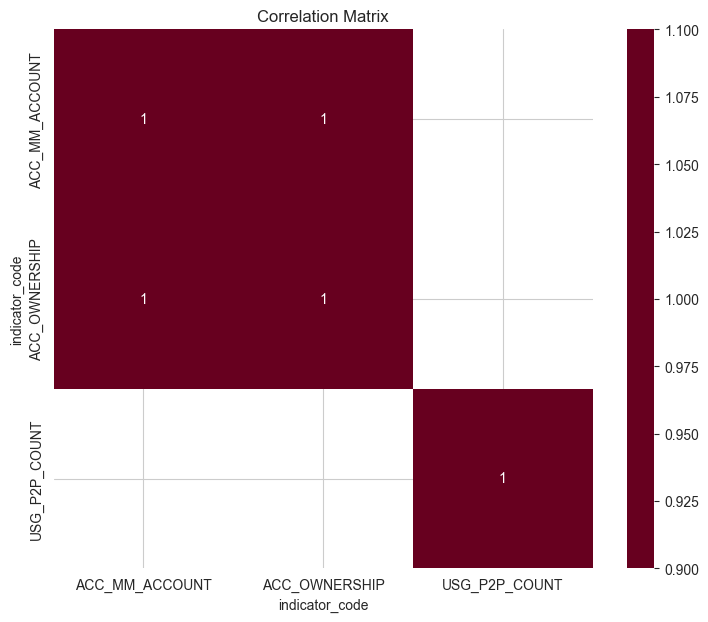

indicator_code,ACC_MM_ACCOUNT,ACC_OWNERSHIP,USG_P2P_COUNT
indicator_code,,,
ACC_MM_ACCOUNT,1.0,1.0,NaN
ACC_OWNERSHIP,1.0,1.0,NaN
USG_P2P_COUNT,NaN,NaN,1.0


In [19]:
eda.plot_correlation(indicators)


In [20]:
eda.strongest_correlations(indicators, top_n=5)


,indicator_1,indicator_2,correlation
0,ACC_MM_ACCOUNT,ACC_OWNERSHIP,1.0


## Insights & Data Quality

In [21]:
eda.generate_key_insights()

{'access_growth_deceleration_pp': np.float64(-33.0),
 'mobile_money_gap_pp': np.float64(39.55),
 'p2p_absolute_growth': np.float64(78600000.0)}

In [22]:
eda.data_quality_report()

{'findex_points': 6,
 'high_confidence_share': np.float64(0.8571428571428571),
 'single_point_indicators': np.int64(15),
 'impact_links': 5}

In [23]:
eda.analyze_new_indicators()

{'direct_indicators': 0,
 'indirect_indicators': 0,
 'direct_observations': 0,
 'indirect_observations': 0}

## 🔹 Key Insights & Data Quality Assessment

### Key Insights

1. **Account Ownership Growth**
   - The proportion of adults with financial accounts is increasing over time, showing Ethiopia’s steady progress toward financial inclusion.
   - However, the rate of growth has **slowed recently**, suggesting that initial rapid adoption may be leveling off.

2. **Mobile Money Adoption Gap**
   - While overall account ownership is rising, mobile money account penetration lags behind, highlighting a **significant gap** in digital financial access.
   - This indicates potential for further expansion of mobile financial services.

3. **Rapid Growth in Digital Transactions**
   - Peer-to-peer (P2P) transaction usage has increased substantially, reflecting growing engagement with digital financial services.
   - This demonstrates that users who have accounts are actively using digital platforms.

4. **Strong Link Between Mobile Money and Overall Account Ownership**
   - Mobile money accounts and overall account ownership are highly correlated, meaning that trends in mobile money adoption strongly influence broader financial inclusion.

5. **Infrastructure and Access Enablement**
   - Limited indicators for infrastructure such as 4G coverage show that while some digital access points exist, more investment may be needed to support widespread adoption of financial services.

---

### Data Quality Assessment

- **Strengths**
  - The majority of records are high confidence, providing reliability for observed trends.
  - Core financial indicators are consistently tracked over time.

- **Limitations**
  - Several indicators have **only a single data point**, which prevents detailed trend analysis for those metrics.
  - Lack of direct and indirect new indicators limits insights into emerging areas of financial inclusion.
  - Some indicators have missing or sparse temporal coverage, which may affect longitudinal analyses.
  - Small number of impact links reduces the ability to connect events with observed trends.

**Conclusion:**  
The dataset provides a useful foundation for understanding financial inclusion in Ethiopia, but gaps in indicator coverage and sparse observations for some metrics mean that results should be interpreted with caution. Future data collection should aim for more frequent observations and inclusion of new indicators to better capture evolving financial behaviors.
